In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as skl
import itertools

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import os
import sys
import tqdm
import copy
import gc

import correlation_data_utilities

In [2]:
dataDir='dataFiles'
coEvoExcelFileName='Pz1pilotMatrix.xlsx'
coEvoExcelFilePath='/'.join([dataDir,coEvoExcelFileName])

coEvoExcelData=pd.read_excel(coEvoExcelFilePath)

In [3]:
coEvoExcelData=coEvoExcelData[
        [colName for colName in coEvoExcelData.columns if not ('Unnamed' in colName)]
    ].dropna()
coEvoExcelData.head()

,M,E,P,H,V,L,G,A,G.1,L.1,...,T.132,M.63,I.121,K.91,W.58,T.133,R.159,E.144,R.160,E.145
0,3.707637,2.267215,1.725928,2.335673,1.938846,1.581054,1.166671,1.747949,0.987664,1.697498,...,0.144138,0.184068,0.145280,0.053497,0.173665,0.144138,0.263722,0.433849,0.282401,0.266909
1,2.267215,1.719393,1.308896,1.793282,1.270798,1.200645,0.964736,1.318684,0.783489,1.251839,...,0.109310,0.043599,0.110177,0.036431,0.131702,0.109310,0.199999,0.434018,0.100885,0.079314
2,1.725928,1.308896,1.416655,1.880338,1.296152,1.010309,1.085582,1.177491,0.837624,1.101587,...,0.118309,0.081132,0.119247,0.142364,0.142545,0.118309,0.039875,0.248130,0.175998,0.138367
3,2.335673,1.793282,1.880338,2.853980,1.873477,1.541179,1.571256,1.787198,1.244984,1.502328,...,0.157033,0.049730,0.158278,0.142470,0.189201,0.157033,0.039905,0.429440,0.203429,0.310174
4,1.938846,1.270798,1.296152,1.873477,1.614800,1.064922,1.037570,1.098043,0.781868,1.056634,...,0.108246,0.026445,0.109104,0.049497,0.130420,0.108246,0.198052,0.282912,0.250880,0.051314


In [4]:
coEvoSeq=np.array(coEvoExcelData.columns.map(lambda x: x.split('.')[0]))
coEvoSeq

array(['M', 'E', 'P', ..., 'E', 'R', 'E'], dtype=object)

In [5]:
coEvoExcelData.columns=np.arange(len(coEvoExcelData.columns))
coEvoExcelData.head()

,0,1,2,3,4,5,6,7,8,9,...,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546
0,3.707637,2.267215,1.725928,2.335673,1.938846,1.581054,1.166671,1.747949,0.987664,1.697498,...,0.144138,0.184068,0.145280,0.053497,0.173665,0.144138,0.263722,0.433849,0.282401,0.266909
1,2.267215,1.719393,1.308896,1.793282,1.270798,1.200645,0.964736,1.318684,0.783489,1.251839,...,0.109310,0.043599,0.110177,0.036431,0.131702,0.109310,0.199999,0.434018,0.100885,0.079314
2,1.725928,1.308896,1.416655,1.880338,1.296152,1.010309,1.085582,1.177491,0.837624,1.101587,...,0.118309,0.081132,0.119247,0.142364,0.142545,0.118309,0.039875,0.248130,0.175998,0.138367
3,2.335673,1.793282,1.880338,2.853980,1.873477,1.541179,1.571256,1.787198,1.244984,1.502328,...,0.157033,0.049730,0.158278,0.142470,0.189201,0.157033,0.039905,0.429440,0.203429,0.310174
4,1.938846,1.270798,1.296152,1.873477,1.614800,1.064922,1.037570,1.098043,0.781868,1.056634,...,0.108246,0.026445,0.109104,0.049497,0.130420,0.108246,0.198052,0.282912,0.250880,0.051314


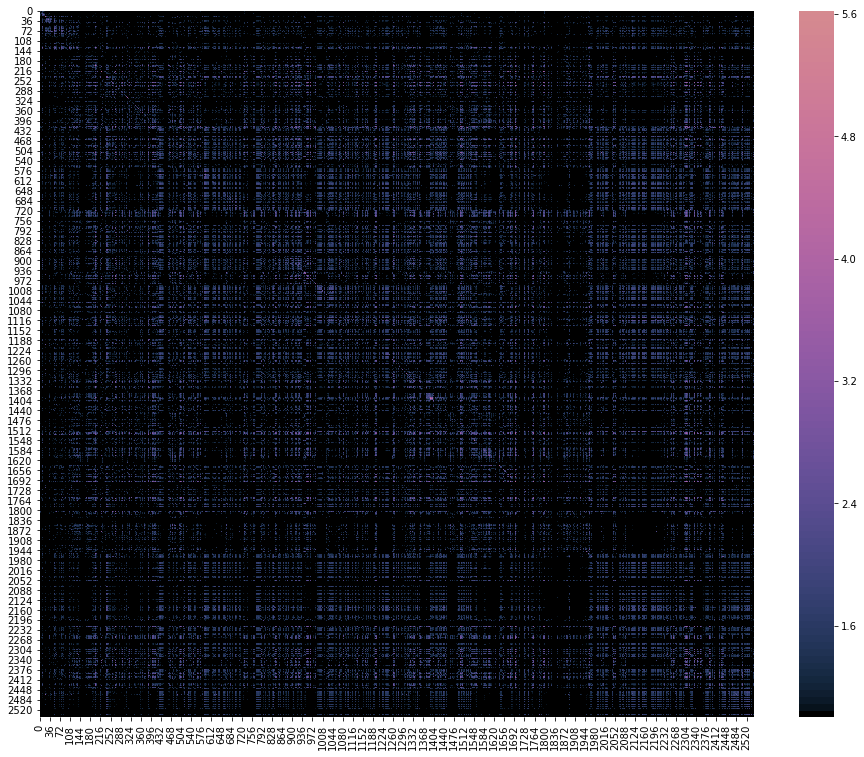

In [6]:
plt.figure(figsize=(16,13))
plotData=np.array(coEvoExcelData)
#plotData=plotData*(plotData>1)
sns.heatmap(data=plotData,
            cmap=sns.cubehelix_palette(
                n_colors=1024,
                start=2.7,
                rot=1,
                gamma=.5,
                hue=1,
                light=.4,
                dark=0,
                reverse=True),
            vmin=1)
plt.show()

In [7]:
sns.choose_cubehelix_palette()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT05LCBkZXNjcmlwdGlvbj11J25fY29sb3JzJywgbWF4PTE2LCBtaW49MiksIEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3LigKY=


[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.3531778140503475],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

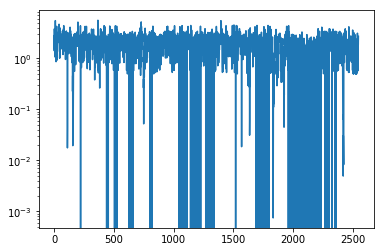

In [8]:
sns.lineplot(data=np.diag(np.matrix(coEvoExcelData)))
plt.yscale('log')
plt.show()

In [9]:
corrMatDir='/'.join([dataDir,'simulation_network_matrices'])

matChunkFileList=[matFile for matFile in os.listdir(corrMatDir) if 'window' in matFile]
windows=np.unique([matFile.split('.')[0] for matFile in matChunkFileList])
print matChunkFileList
print windows

['window_03.g_corr.pearson.ah', 'window_03.g_corr.pearson.aa', 'window_03.g_corr.pearson.af', 'window_03.g_corr.pearson.ag', 'window_03.g_corr.pearson.ai', 'window_02.g_corr.pearson.ah', 'window_02.g_corr.pearson.aa', 'window_02.g_corr.pearson.af', 'window_02.g_corr.pearson.ag', 'window_02.g_corr.pearson.ai', 'window_01.g_corr.pearson.ah', 'window_04.g_corr.pearson.ag', 'window_01.g_corr.pearson.aa', 'window_04.g_corr.pearson.ai', 'window_01.g_corr.pearson.af', 'window_04.g_corr.pearson.ah', 'window_01.g_corr.pearson.ag', 'window_01.g_corr.pearson.ai', 'window_04.g_corr.pearson.af', 'window_04.g_corr.pearson.aa', 'window_00.g_corr.pearson.ah', 'window_05.g_corr.pearson.ag', 'window_00.g_corr.pearson.aa', 'window_05.g_corr.pearson.ai', 'window_00.g_corr.pearson.af', 'window_05.g_corr.pearson.ah', 'window_00.g_corr.pearson.ag', 'window_00.g_corr.pearson.ai', 'window_05.g_corr.pearson.af', 'window_05.g_corr.pearson.aa', 'window_03.g_corr.pearson.ae', 'window_03.g_corr.pearson.ab', 'window

In [10]:
corrMatDir='/'.join([dataDir,'simulation_network_matrices'])

matType='g_corr.pearson'
startChunk='aa'

def parseTokens(tokens,fun=float):
    for x in tokens:
        try:
            yield float(x)
        except ValueError:
            pass

matrixDict={}
        
for window in windows:
    windowChunks=np.sort([matChunk for matChunk in matChunkFileList \
                  if (window in matChunk) & (matType in matChunk)])
    print '%s %s matrix file chunk list: '%(window,matType),
    print windowChunks
    
    matrixDataChunks=[]
    
    iCol=0
    iRow=0
    nRows=0
    nCols=0
    print 'Reading in matrix file chunks'
    for windowChunk in tqdm.tqdm_notebook(windowChunks):
        chunkFilePath='/'.join([corrMatDir,windowChunk])
        with open(chunkFilePath,'r') as chunkFile:
            corrMatDir='/'.join([dataDir,'simulation_network_matrices'])
            line=chunkFile.readline()
            
            if 'aa' in windowChunk:
                tokens=np.array(list(parseTokens(line.split())))
                nRows=int(tokens[0])
                nCols=int(tokens[1])
                matrixDataChunks.append(tokens[2:])
                line=chunkFile.readline()
            while line:
                tokens=np.array(list(parseTokens(line.split())))
                matrixDataChunks.append(tokens)
                line=chunkFile.readline()
    print 'converting to numpy matrix format'
    matrixData={'nRows':nRows,'nCols':nCols,'entries':np.concatenate(matrixDataChunks)}
    matrixDict[window]=correlation_data_utilities.corrDataDictToMat(matrixData)
    print '--- --- ---'

print 'Done'
print matrixDict

window_00 g_corr.pearson matrix file chunk list:  ['window_00.g_corr.pearson.aa' 'window_00.g_corr.pearson.ab'
 'window_00.g_corr.pearson.ac' 'window_00.g_corr.pearson.ad'
 'window_00.g_corr.pearson.ae' 'window_00.g_corr.pearson.af'
 'window_00.g_corr.pearson.ag' 'window_00.g_corr.pearson.ah'
 'window_00.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
--- --- ---
window_01 g_corr.pearson matrix file chunk list:  ['window_01.g_corr.pearson.aa' 'window_01.g_corr.pearson.ab'
 'window_01.g_corr.pearson.ac' 'window_01.g_corr.pearson.ad'
 'window_01.g_corr.pearson.ae' 'window_01.g_corr.pearson.af'
 'window_01.g_corr.pearson.ag' 'window_01.g_corr.pearson.ah'
 'window_01.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
--- --- ---
window_02 g_corr.pearson matrix file chunk list:  ['window_02.g_corr.pearson.aa' 'window_02.g_corr.pearson.ab'
 'window_02.g_corr.pearson.ac' 'window_02.g_corr.pearson.ad'
 'window_02.g_corr.pearson.ae' 'window_02.g_corr.pearson.af'
 'window_02.g_corr.pearson.ag' 'window_02.g_corr.pearson.ah'
 'window_02.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
--- --- ---
window_03 g_corr.pearson matrix file chunk list:  ['window_03.g_corr.pearson.aa' 'window_03.g_corr.pearson.ab'
 'window_03.g_corr.pearson.ac' 'window_03.g_corr.pearson.ad'
 'window_03.g_corr.pearson.ae' 'window_03.g_corr.pearson.af'
 'window_03.g_corr.pearson.ag' 'window_03.g_corr.pearson.ah'
 'window_03.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
--- --- ---
window_04 g_corr.pearson matrix file chunk list:  ['window_04.g_corr.pearson.aa' 'window_04.g_corr.pearson.ab'
 'window_04.g_corr.pearson.ac' 'window_04.g_corr.pearson.ad'
 'window_04.g_corr.pearson.ae' 'window_04.g_corr.pearson.af'
 'window_04.g_corr.pearson.ag' 'window_04.g_corr.pearson.ah'
 'window_04.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
--- --- ---
window_05 g_corr.pearson matrix file chunk list:  ['window_05.g_corr.pearson.aa' 'window_05.g_corr.pearson.ab'
 'window_05.g_corr.pearson.ac' 'window_05.g_corr.pearson.ad'
 'window_05.g_corr.pearson.ae' 'window_05.g_corr.pearson.af'
 'window_05.g_corr.pearson.ag' 'window_05.g_corr.pearson.ah'
 'window_05.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
--- --- ---
Done
{'window_02': matrix([[1.      , 0.954036, 0.929031, ..., 0.413307, 0.441715, 0.381947],
        [0.954036, 1.      , 0.974003, ..., 0.375102, 0.405039, 0.345884],
        [0.929031, 0.974003, 1.      , ..., 0.293402, 0.328828, 0.31239 ],
        ...,
        [0.413307, 0.375102, 0.293402, ..., 1.      , 0.950909, 0.775824],
        [0.441715, 0.405039, 0.328828, ..., 0.950909, 1.      , 0.861207],
        [0.381947, 0.345884, 0.31239 , ..., 0.775824, 0.861207, 1.      ]]), 'window_03': matrix([[1.      , 0.990232, 0.971338, ..., 0.38595 , 0.344828, 0.327539],
        [0.990232, 1.      , 0.988133, ..., 0.373817, 0.339276, 0.328034],
        [0.971338, 0.988133, 1.      , ..., 0.393533, 0.346449, 0.329839],
        ...,
        [0.38595 , 0.373817, 0.393533, ..., 1.      , 0.884689, 0.706315],
        [0.344828, 0.339276, 0.346449, ..., 0.884689, 1.      , 0.901769],
        [0.327539, 0.328034, 0.329839, ..., 0.706315, 0.901769, 1.  

In [11]:
sns.choose_cubehelix_palette()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT05LCBkZXNjcmlwdGlvbj11J25fY29sb3JzJywgbWF4PTE2LCBtaW49MiksIEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3LigKY=


[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.3531778140503475],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

generating heat map plots


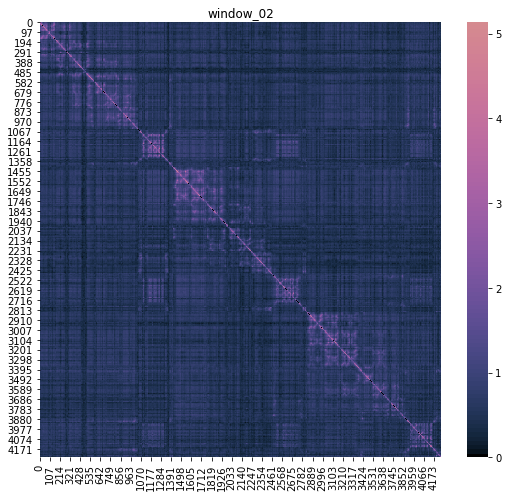

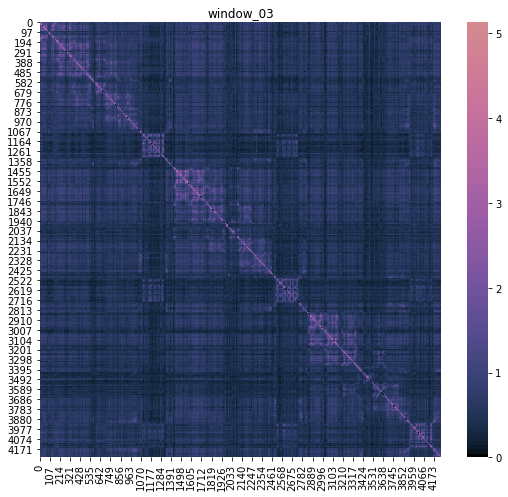

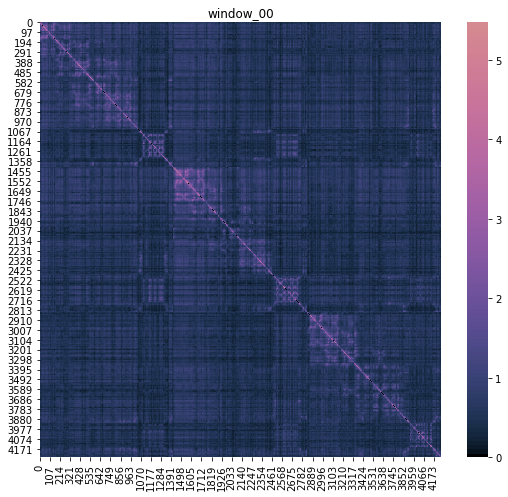

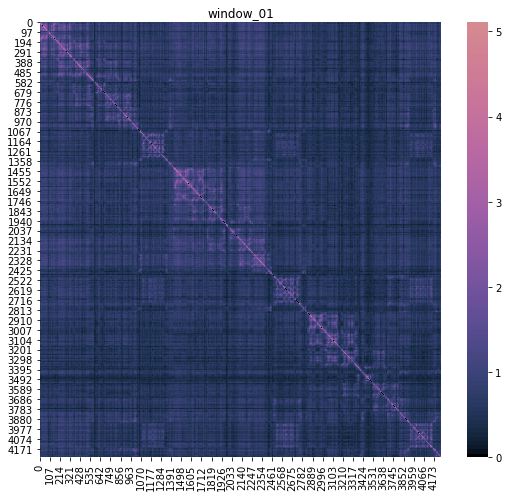

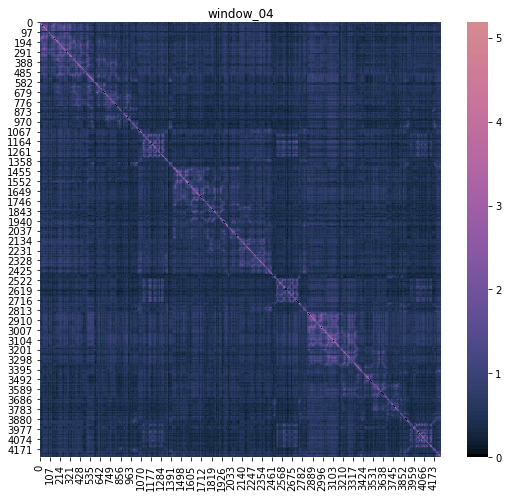

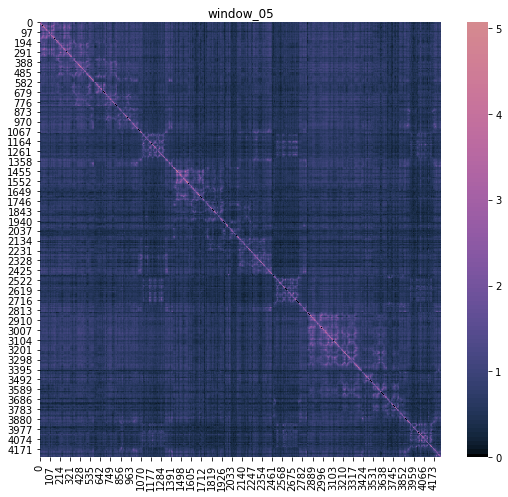

In [12]:
print 'generating heat map plots'
for matrixEntry in tqdm.tqdm_notebook(matrixDict):
    plt.figure(figsize=(9,8))
    plotData=1-np.abs(matrixDict[matrixEntry])
    for iRow,row in enumerate(plotData):
        plotData[iRow,iRow]=1
    plotData=-np.log(plotData)
    sns.heatmap(data=plotData,
                cmap=sns.cubehelix_palette(
                n_colors=1024,
                start=2.7,
                rot=1,
                gamma=.5,
                hue=1,
                light=.4,
                dark=0,
                reverse=True))
    plt.title(matrixEntry)
    plt.show()

In [13]:
tempFrame=pd.DataFrame(matrixDict['window_00'])
tempFrame['ResIndex_1']=np.arange(tempFrame.shape[0])
tempFrame=pd.melt(frame=tempFrame,id_vars='ResIndex_1',var_name='ResIndex_2',value_name='Corr')
tempFrame.head()

,ResIndex_1,ResIndex_2,Corr
0,0,0,1.000000
1,1,0,0.976665
2,2,0,0.951593
3,3,0,0.934067
4,4,0,0.928096


In [14]:
baseDir='./'
xcelData=pd.read_excel(baseDir+'Residue_ID_total_occupancy_10_1_2019.xlsx',
              sheet_name=None)

In [15]:
resinfoDataSheet=xcelData['resinfo_table']
resinfoTable=resinfoDataSheet[
    resinfoDataSheet.columns[[0,3,5,7]]][2:]
resinfoTable.columns=['PDB_ID','Arm1_Resid','Arm2_Resid','Arm3_Resid']
resinfoTable.head()

,PDB_ID,Arm1_Resid,Arm2_Resid,Arm3_Resid
2,782,1,1419,2837
3,783,2,1420,2838
4,784,3,1421,2839
5,785,4,1422,2840
6,786,5,1423,2841


In [16]:
resinfoTableFilled=copy.deepcopy(resinfoTable)
print resinfoTableFilled.PDB_ID.isna().sum()
for iEntry in resinfoTableFilled.PDB_ID.index:
    entry=resinfoTableFilled.PDB_ID[iEntry]
    if np.isnan(entry):
        lastVal=lastVal+1
        resinfoTableFilled.PDB_ID[iEntry]=lastVal
    else:
        lastVal=entry
print resinfoTableFilled.PDB_ID.isna().sum()
simResid_to_pdbResid=list(np.array(resinfoTableFilled.PDB_ID))*3
print ', '.join(map(str,simResid_to_pdbResid))

53
0
782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 

In [17]:
tqdm.tqdm.pandas(tqdm.tqdm_notebook)
tempFrame['PDBresid_1']=tempFrame['ResIndex_1'].progress_map(lambda x: simResid_to_pdbResid[x])
tempFrame['PDBresid_2']=tempFrame['ResIndex_2'].progress_map(lambda x: simResid_to_pdbResid[x])
tempFrame.head()

100%|██████████| 18096516/18096516 [00:26<00:00, 692523.01it/s]


,ResIndex_1,ResIndex_2,Corr,PDBresid_1,PDBresid_2
0,0,0,1.000000,782,782
1,1,0,0.976665,783,782
2,2,0,0.951593,784,782
3,3,0,0.934067,785,782
4,4,0,0.928096,786,782


In [18]:
matKeys=matrixDict.keys()
seqFrames=[]
with tqdm.tqdm_notebook(matKeys) as window_pbar:
    with tqdm.tqdm_notebook() as work_pbar:
        for matKey in matKeys:
            window_pbar.set_description(matKey)
            tempFrame=pd.DataFrame(matrixDict[matKey])
            tempFrame['ResIndex_1']=np.arange(tempFrame.shape[0])
            tempFrame=pd.melt(
                frame=tempFrame,
                id_vars='ResIndex_1',
                var_name='ResIndex_2',
                value_name='Corr')
            work_pbar.pandas(desc='Computing %s PDB Resid 1'%matKey)
            tempFrame['PDBresid_1']=tempFrame['ResIndex_1'].progress_map(
                lambda x: simResid_to_pdbResid[x])
            work_pbar.pandas(desc='Computing %s PDB Resid 2'%matKey)
            tempFrame['PDBresid_2']=tempFrame['ResIndex_2'].progress_map(
                lambda x: simResid_to_pdbResid[x])
            print 'Aggregatting correlations over all arms'
            seqFrame=tempFrame.groupby(
                    ['PDBresid_1','PDBresid_2']
                ).agg({'Corr':np.max}).reset_index()
            seqFrame['Window']=matKey
            seqFrames.append(seqFrame.copy())
            window_pbar.update()
            gc.collect()
corrSeqData=pd.concat(seqFrames)
corrSeqData.head()

SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAyIFBEQiBSZXNpZCAxJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAyIFBEQiBSZXNpZCAyJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


Aggregatting correlations over all arms


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAzIFBEQiBSZXNpZCAxJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAzIFBEQiBSZXNpZCAyJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


Aggregatting correlations over all arms


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAwIFBEQiBSZXNpZCAxJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAwIFBEQiBSZXNpZCAyJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


Aggregatting correlations over all arms


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAxIFBEQiBSZXNpZCAxJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzAxIFBEQiBSZXNpZCAyJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


Aggregatting correlations over all arms


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzA0IFBEQiBSZXNpZCAxJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzA0IFBEQiBSZXNpZCAyJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


Aggregatting correlations over all arms


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzA1IFBEQiBSZXNpZCAxJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdDb21wdXRpbmcgd2luZG93XzA1IFBEQiBSZXNpZCAyJywgbWF4PTE4MDk2NTE2LCBzdHlsZT1Qcm9ncmXigKY=


Aggregatting correlations over all arms



,PDBresid_1,PDBresid_2,Corr,Window
0,782,782,1.000000,window_02
1,782,783,0.954036,window_02
2,782,784,0.929031,window_02
3,782,785,0.896597,window_02
4,782,786,0.863765,window_02


In [19]:
corrSeqData.to_csv('sequence_dynamic_correlation_data_table.csv',index=False)

window_02

/Users/wbotellosmith/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


 window_03 window_00 window_01 window_04 window_05 co_evolution


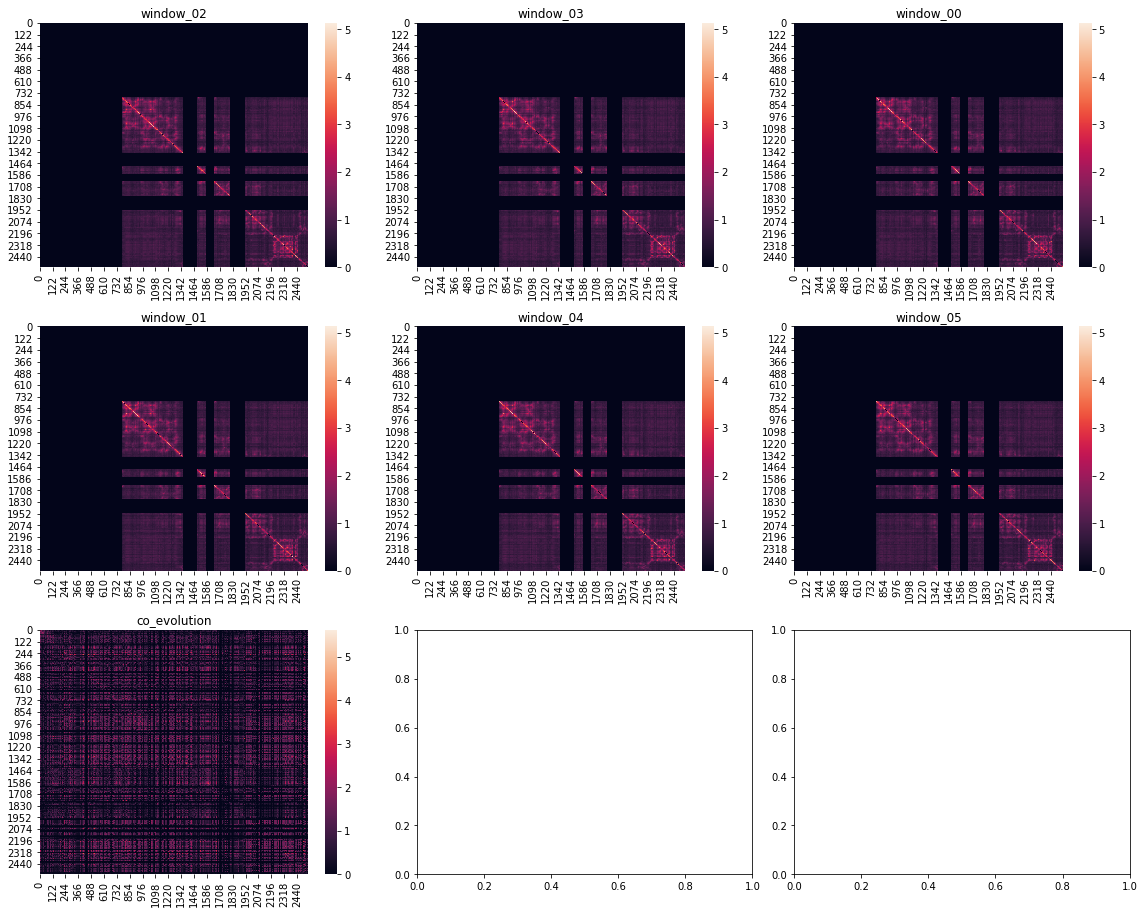

In [20]:
seqMatDict={}

nPlots=len(corrSeqData['Window'].unique())+1
nRow=int(np.ceil(np.sqrt(nPlots)))
nCol=int(np.ceil(1.*nPlots/nRow))

lowCut=0

fig,axs=plt.subplots(nRow,nCol)

fig.set_figwidth(16)
fig.set_figheight(.8*16.*nCol/nRow)

for iAx,window in enumerate(corrSeqData['Window'].unique()):
    print window,
    ax=axs.flat[iAx]
    testDat=corrSeqData[corrSeqData['Window']=='window_02']

    testMat=np.array(sp.sparse.coo_matrix(
        (-np.log(1.-testDat['Corr']),
        (testDat['PDBresid_1'],testDat['PDBresid_2'])),
        shape=np.array(coEvoExcelData).shape).todense())

    testMat[np.nonzero(1-np.isfinite(testMat))]=0
    
    sns.heatmap(testMat,ax=ax,vmin=lowCut)
    ax.set_title(window)
    #plt.show()
    seqMatDict[window]=testMat

print 'co_evolution'
ax=axs.flat[iAx+1]
testDat=coEvoExcelData

testMat=np.matrix(np.array(coEvoExcelData))

sns.heatmap(testMat,ax=ax,vmin=lowCut)

ax.set_title('co_evolution')
plt.tight_layout()
plt.show()

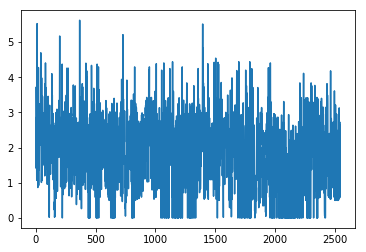

In [21]:
plt.plot(np.diag(np.array(coEvoExcelData)))
plt.show()

ValueError: Colormap <module 'matplotlib' from '/Users/wbotellosmith/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.pyc'> is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

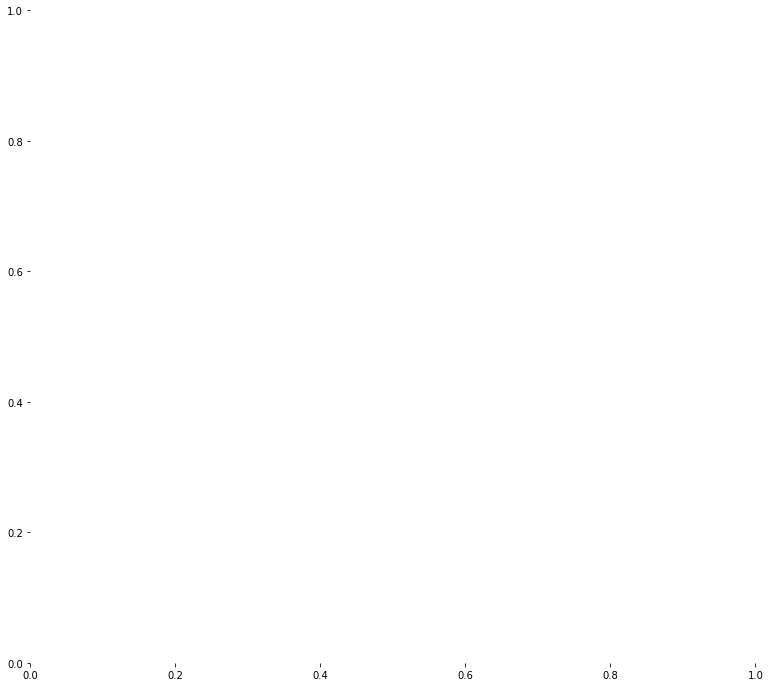

In [217]:
testMat=np.matrix(np.array(coEvoExcelData))
plt.figure(figsize=(13,12))
sns.heatmap(testMat,
            vmin=np.quantile(testMat[np.nonzero(testMat)],q=.90))

plt.title('co_evolution')
plt.show()

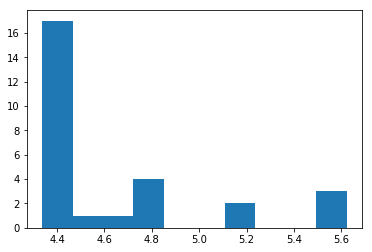

In [22]:
plt.hist(np.array(testMat)[np.nonzero(testMat>np.quantile(testMat[np.nonzero(testMat)],q=.999995))])
plt.show()

In [23]:
print len(list(np.array(testMat)[np.nonzero(testMat>np.quantile(testMat[np.nonzero(testMat)],q=.999995))]))
list(np.array(testMat)[np.nonzero(testMat>np.quantile(testMat[np.nonzero(testMat)],q=.999995))])

28


[5.52540892084225,
 4.69624144793639,
 4.40725760900849,
 4.45244875572103,
 4.45244875572103,
 5.17291977278185,
 4.37276892301364,
 5.62174849452278,
 4.4003651852417,
 4.33753221579782,
 4.37276892301364,
 5.21177055814071,
 4.38502319422686,
 4.40725760900849,
 4.44081127962246,
 4.83489332867529,
 4.83489332867529,
 5.51432345273413,
 4.83489332867529,
 4.83489332867529,
 4.38502319422686,
 4.42419926340306,
 4.54323623043975,
 4.42419926340306,
 4.37276892301364,
 4.44123428065122,
 4.44081127962246,
 4.40725760900849]

In [24]:
pdbResid_to_simResIndex={}
for simResIndex,pdbResid in enumerate(simResid_to_pdbResid):
    if pdbResid in pdbResid_to_simResIndex:
        pdbResid_to_simResIndex[pdbResid].append(simResIndex)
    else:
        pdbResid_to_simResIndex[pdbResid]=[simResIndex]
pdbResid_to_simResIndex

{782: [0, 1418, 2836],
 783: [1, 1419, 2837],
 784: [2, 1420, 2838],
 785: [3, 1421, 2839],
 786: [4, 1422, 2840],
 787: [5, 1423, 2841],
 788: [6, 1424, 2842],
 789: [7, 1425, 2843],
 790: [8, 1426, 2844],
 791: [9, 1427, 2845],
 792: [10, 1428, 2846],
 793: [11, 1429, 2847],
 794: [12, 1430, 2848],
 795: [13, 1431, 2849],
 796: [14, 1432, 2850],
 797: [15, 1433, 2851],
 798: [16, 1434, 2852],
 799: [17, 1435, 2853],
 800: [18, 1436, 2854],
 801: [19, 1437, 2855],
 802: [20, 1438, 2856],
 803: [21, 1439, 2857],
 804: [22, 1440, 2858],
 805: [23, 1441, 2859],
 806: [24, 1442, 2860],
 807: [25, 1443, 2861],
 808: [26, 1444, 2862],
 809: [27, 1445, 2863],
 810: [28, 1446, 2864],
 811: [29, 1447, 2865],
 812: [30, 1448, 2866],
 813: [31, 1449, 2867],
 814: [32, 1450, 2868],
 815: [33, 1451, 2869],
 816: [34, 1452, 2870],
 817: [35, 1453, 2871],
 818: [36, 1454, 2872],
 819: [37, 1455, 2873],
 820: [38, 1456, 2874],
 821: [39, 1457, 2875],
 822: [40, 1458, 2876],
 823: [41, 1459, 2877],
 8

In [25]:
highCoev_pdbIDs=np.array(testMat)[np.nonzero(testMat>np.quantile(testMat[np.nonzero(testMat)],q=.999995))]
highCoev_simIDs=np.concatenate(map(
    lambda x: pdbResid_to_simResIndex[x] if (x in pdbResid_to_simResIndex) else [],
    highCoev_pdbIDs))
highCoev_simIDs

array([], dtype=float64)

In [26]:
highCoev_pdbIDs

array([5.52540892, 4.69624145, 4.40725761, ..., 4.44123428, 4.44081128,
       4.40725761])

In [27]:
qCutPair=.99995
highCoev_PDBpairs=np.nonzero(testMat>np.quantile(testMat[np.nonzero(testMat)],q=qCutPair))

highCoev_SIMpairs=np.concatenate(
    [
        [(a,b) for a in pdbResid_to_simResIndex[pdbPair[0]] \
               for b in pdbResid_to_simResIndex[pdbPair[1]]] \
        for pdbPair in zip(highCoev_PDBpairs[0]+1,highCoev_PDBpairs[1]+1) \
        if (pdbPair[0] in pdbResid_to_simResIndex) & \
           (pdbPair[1] in pdbResid_to_simResIndex) & \
           (pdbPair[0] != pdbPair[1])
    ]
)
print highCoev_SIMpairs

qCutCons=.95
pdbResCons=np.diag(testMat)

highCons_PDBres=np.nonzero(pdbResCons>np.quantile(pdbResCons,q=qCutCons))
highCons_SIMres=np.concatenate(
    [
        pdbResid_to_simResIndex[pdbRes] \
        for pdbRes in highCons_PDBres[0]+1 \
        if pdbRes in pdbResid_to_simResIndex
    ]
)
print highCons_SIMres

[[ 169  444]
 [ 169 1862]
 [ 169 3280]
 ...
 [4071  714]
 [4071 2132]
 [4071 3550]]
[  18 1436 2854 ... 1370 2788 4206]


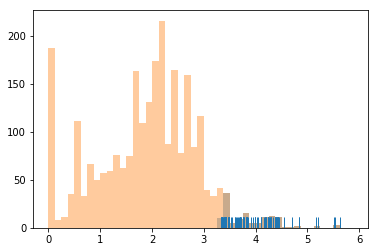

In [28]:
sns.distplot(pdbResCons[highCons_PDBres],bins=np.arange(0,6,.125),kde=False,norm_hist=False,rug=True)
sns.distplot(pdbResCons,bins=np.arange(0,6,.125),kde=False,norm_hist=False)
plt.show()

In [29]:
@interact_manual
def plot_high_cons_hist(qCut=widgets.FloatSlider(
                            min=1e-5,max=.5,step=1e-5,
                            value=.5,readout_format='.5f'),
                        cutType=['Upper','Lower','Both'],
                        normHist=[True,False],
                        rug=[True,False],
                        kde=[True,False],
                        logScale=[True,False]):
    testMat=np.array(coEvoExcelData)
    plt.figure(figsize=(12,9))
    pdbResCons=np.diag(testMat)
    if cutType=='Upper':
        highCons_PDBres=np.nonzero(pdbResCons>np.quantile(pdbResCons,q=1-qCut))
    elif cutType=='Lower':
        highCons_PDBres=np.nonzero(pdbResCons<np.quantile(pdbResCons,q=qCut))
    else:
        highCons_PDBres=np.nonzero(
            (pdbResCons<np.quantile(pdbResCons,q=qCut/2.)) + \
            (pdbResCons>np.quantile(pdbResCons,q=1-qCut/2.)))
    
    print "N values: %d"%len(highCons_PDBres[0])
    #print highCons_SIMres
    sns.distplot(pdbResCons[highCons_PDBres],
                 bins=np.arange(0,6,.125),
                 kde=kde,
                 norm_hist=normHist,
                 rug=rug)
    sns.distplot(pdbResCons,
                 bins=np.arange(0,6,.125),
                 kde=kde,
                 norm_hist=normHist)
    if normHist | kde:
        yType='freq'
    else:
        yType='count'
    if logScale:
        plt.yscale('log',basey=10)
        plt.ylabel('log10(%s)'%yType)
    else:
        plt.ylabel('%s'%yType)
    plt.xlabel('Score')
    plt.xlim(0,np.max(pdbResCons))
    plt.show()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdxQ3V0JywgbWF4PTAuNSwgbWluPTFlLTA1LCByZWFkb3V0X2Zvcm1hdD11Jy41ZicsIHPigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdxQ3V0JywgbWF4PTAuNSwgbWluPTFlLTA2LCByZWFkb3V0X2Zvcm1hdD11Jy42ZicsIHPigKY=


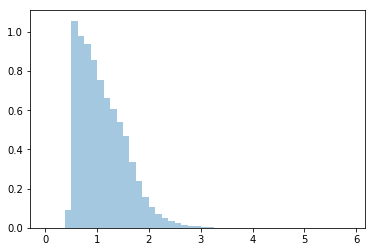

In [30]:
@interact_manual
def plot_high_coev_hist(qCut=widgets.FloatSlider(
                            min=1e-6,max=.5,step=1e-6,
                            value=.5,readout_format='.6f'),
                        cutType=['Upper','Lower','Both'],
                        normHist=[True,False],
                        rug=[True,False],
                        kde=[True,False],
                        logScale=[True,False]):
    
    coEvDat=np.array(coEvoExcelData)
    for ii in np.arange(np.min(coEvDat.shape)):
        coEvDat[ii,ii]=0
    coEvDat=coEvDat[np.nonzero(coEvDat)]
    if cutType=='Upper':
        highCons_PDBpairs=np.nonzero(coEvDat>np.quantile(coEvDat,q=1-qCut))
    elif cutType=='Lower':
        highCons_PDBpairs=np.nonzero(coEvDat<np.quantile(coEvDat,q=qCut))
    else:
        highCons_PDBpairs=np.nonzero(
            (coEvDat<np.quantile(coEvDat,q=qCut/2.)) + \
            (coEvDat>np.quantile(coEvDat,q=1-qCut/2.)))
    
    Nvals=len(highCons_PDBpairs[0])
    print "N values: %d"%Nvals
    
    useKde=kde
    if Nvals > 25000:
        useKde=False
    
    #print highCons_SIMres
    sns.distplot(coEvDat[highCons_PDBpairs],
                 bins=np.arange(0,6,.125),
                 kde=useKde,
                 norm_hist=normHist,
                 rug=rug)
    sns.distplot(coEvDat,
                 bins=np.arange(0,6,.125),
                 kde=useKde,
                 norm_hist=normHist)
    if normHist | useKde:
        yType='freq'
    else:
        yType='count'
    if logScale:
        plt.yscale('log',basey=10)
        plt.ylabel('log10(%s)'%yType)
    else:
        plt.ylabel('%s'%yType)
    plt.xlabel('Score')
    plt.xlim(0,np.max(coEvDat))
    plt.show()

In [31]:
qRes=0.01


testMat=np.array(coEvoExcelData)
pdbResCons=np.diag(testMat)
highCons_PDBres=np.nonzero(pdbResCons>np.quantile(pdbResCons,q=1-qRes))[0]

highCons_SIMres=np.concatenate([
    pdbResid_to_simResIndex[pdbRes] \
    for pdbRes in highCons_PDBres \
    if pdbRes in pdbResid_to_simResIndex
])
print "Quantile: %.3e (upper)"%(qRes)
print "N highly conserved residue sequence IDs: %g; number in Sim: %g (%.3f%s)"%(
    len(highCons_PDBres),
    len(highCons_SIMres)/3,
    len(highCons_SIMres)/3.0/len(highCons_PDBres)*100.,
    '%')
print "N highly conserved residue simulation IDs: %g"%(
    len(highCons_SIMres))

Quantile: 1.000e-02 (upper)
N highly conserved residue sequence IDs: 24; number in Sim: 9 (37.500%)
N highly conserved residue simulation IDs: 27


In [67]:
qPair=.00001

coEvDat=np.array(coEvoExcelData)
for ii in np.arange(np.min(coEvDat.shape)):
    coEvDat[ii,ii]=0
coEvVals=coEvDat[np.nonzero(coEvDat)]
highCons_PDBpairs=np.nonzero(coEvDat>np.quantile(coEvVals,q=1-qPair))

highCons_SIMpairs=np.concatenate([
    [(a,b) \
     for a in pdbResid_to_simResIndex[pdbPair[0]] \
     for b in pdbResid_to_simResIndex[pdbPair[1]]]\
    for pdbPair in zip(highCons_PDBpairs[0],highCons_PDBpairs[1]) \
    if (pdbPair[0] in pdbResid_to_simResIndex) & \
       (pdbPair[1] in pdbResid_to_simResIndex)
])
print "Quantile: %.3e (upper)"%(qPair)
print "N highly conserved residue sequence IDs: %g; number in Sim: %g (%.3f%s)"%(
    len(highCons_PDBpairs[0]),
    len(highCons_SIMpairs)/3,
    len(highCons_SIMpairs)/3.0/len(highCons_PDBpairs[0])*100.,
    '%')
print "N highly conserved residue simulation IDs: %g"%(
    len(highCons_SIMpairs))

Quantile: 1.000e-05 (upper)
N highly conserved residue sequence IDs: 54; number in Sim: 18 (33.333%)
N highly conserved residue simulation IDs: 54


In [42]:
import nglview as ngl
import pytraj as pt

In [43]:
strucPDBname='visuzlization_struc.pdb'
strucPDBpath='/'.join([dataDir,strucPDBname])
strucTraj=pt.load(strucPDBpath)
strucTraj

pytraj.Trajectory, 1 frames: 
Size: 0.000000 (GB)
<Topology: 70296 atoms, 4254 residues, 12 mols, PBC with box type = ortho>
           

In [61]:
def drawProtNetEdge(protStruc,resID1,resID2,ngViewOb,
                    frame=0,edgeColor=[.5,.5,.5],radius=1,
                    *shapeArgs,**shapeKwargs):
    crd1=pt.center_of_mass(protStruc,':%g@CA'%resID1)[frame]
    crd2=pt.center_of_mass(protStruc,':%g@CA'%resID2)[frame]
    
    
    resname1=protStruc.topology.residue(resID1-1).name
    resid1=protStruc.topology.residue(resID1-1).original_resid
    
    resname2=protStruc.topology.residue(resID2-1).name
    resid2=protStruc.topology.residue(resID2-1).original_resid
    edgeLabel='%s.%g-%s.%g (%g-%g)'%(
        resname1,resid1,resname2,resid2,
        resID1-1,resID2-2)
    
    return ngViewOb.shape.add_cylinder(
        list(crd1),list(crd2),edgeColor,radius,
        edgeLabel,
        *shapeArgs,**shapeKwargs)

def drawProtCorrMat(protStruc,corrMat,ngViewOb,
                    frame=0,colorsArray=None,radiiMat=None,
                    undirected=True):
    nzInds=np.nonzero(corrMat)
    edgeList=[]
    if not (radiiMat is None):
        radMat=radiiMat
    else:
        radMat=(np.abs(corrMat)>0)*.25
    if undirected:
        indArray=np.array([[ind[0],ind[1]] \
                            for ind in np.array([nzInds[0],nzInds[1]]).T \
                            if ind[0]<ind[1]])
    else:
        indArray=np.array([nzInds[0],nzInds[1]]).T
    for nzInd in indArray:
        if not (colorsArray is None):
            colorParm={'edgeColor':list(colorsArray[nzInd[0],nzInd[1],:])}
        else:
            colorParm={}
        edgeList.append(drawProtNetEdge(
            protStruc,nzInd[0]+1,nzInd[1]+1,
            ngViewOb,frame,radius=radMat[nzInd[0],nzInd[1]],
            **colorParm))
    return edgeList

In [69]:
print "Coevolution Quartile: %.4e (%g edges)"%(
    qPair,len(highCoev_SIMpairs))
print "Conservation Quartile: %.4e (%g residues)"%(
    qRes,len(highCons_SIMres))
view=ngl.show_structure_file(strucPDBpath)
view.clear_representations()
view.add_representation('cartoon',alpha=.5,color='#777777')
for cRes in highCons_SIMres+1:
    view.add_representation('spacefill',selection='%g'%cRes,color='#FF00AA')
for cPair in highCons_SIMpairs:
    drawProtNetEdge(strucTraj,cPair[0]+1,cPair[1]+1,view,
                    edgeColor=[1.0,0.0,.75])
view

Coevolution Quartile: 1.0000e-05 (738 edges)
Conservation Quartile: 1.0000e-02 (27 residues)


NGLWidget()

In [71]:
simResid_to_pdbResid[3670]

1963

In [76]:
print(', '.join(map(str,
                    [res for res in highCons_PDBres if res in pdbResid_to_simResIndex])))

1008, 1071, 1144, 1505, 1525, 1529, 1698, 1790, 1962


In [77]:
len([res for res in highCons_PDBres if res in pdbResid_to_simResIndex])

9